In [23]:
import pandas as pd

In [24]:
train = pd.read_csv('./Data/train_20k.csv',header=None)
test = pd.read_csv('./Data/test_1k.csv',header=None)

In [25]:
# train 결측치
train.isnull().sum().sum()

0

In [26]:
# test 결측치
test.isnull().sum().sum()

0

In [27]:
targetCount = []
for i in sorted(train[0].unique()):
    print(i,":",len(train[train[0] == i]))
    targetCount.append(len(train[train[0] == i]))

targetCount

0 : 1994
1 : 2281
2 : 1929
3 : 2076
4 : 1945
5 : 1776
6 : 1971
7 : 2093
8 : 1922
9 : 2014


[1994, 2281, 1929, 2076, 1945, 1776, 1971, 2093, 1922, 2014]

In [28]:
import numpy as np 
np.min(targetCount) / np.max(targetCount)

0.7786058746163963

### train과 test를 Target(Label)과 Feature(Data)로 분리하고 표준화 하기

In [29]:
train_label = train[0]
train_data = train.loc[:,train.columns != 0 ]
train_data = train_data / 255.0

In [30]:
test_label = test[0]
test_data = test.loc[:,train.columns != 0 ]
test_data = test_data / 255.0

### Deep Learning model 만들기

In [31]:
from tensorflow import keras

In [32]:
model = keras.Sequential()

model.add(keras.layers.Dense(512,activation='relu',input_shape=(784,)))

model.add(keras.layers.Dense(10,activation='softmax'))

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [35]:
hist= model.fit(np.array(train_data),np.array(train_label), epochs=10)

Epoch 1/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9969
Epoch 2/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 3/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.9998
Epoch 4/10
626/626 [==============================] - 1s 2ms/step - loss: 5.6050e-04 - accuracy: 1.0000
Epoch 5/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 6/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9972
Epoch 7/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9989
Epoch 8/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9969
Epoch 9/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 10/10
626/626 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.

---
### 테스트 데이터로 평가하기

In [37]:
score = model.evaluate(test_data,test_label)

print('loss : ',score[0])
print('accuracy : ',score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 0.9760
loss :  0.11290042847394943
accuracy :  0.9760239720344543


### predict

In [39]:
y_hat = model.predict(test_data.iloc[0:4,:])

1/1 [==============================] - 0s 20ms/step


In [49]:
# np.argmax : 예측값중 최대값의 index를 반환
print(np.argmax(model.predict(test_data.loc[0:4]),axis=1))
print(test_label.loc[0:4])

1/1 [==============================] - 0s 11ms/step
[7 2 1 0 4]
0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64


---
### 번외
- 요거 잘해야 된다. <br><br>
- Image 만들기 <br><br>

In [51]:
from PIL import Image

In [63]:
train1 = train.loc[:, train.columns != 0]

In [116]:
abc = np.array(train1.iloc[52]).reshape(28,28)

In [117]:
# 이미지 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [118]:
image.save('./Data/three.jpg','JPEG')

---
### image 불러오기
- image를 불러와서 predict 해보기

In [119]:
img = Image.open('./Data/three.jpg')
img

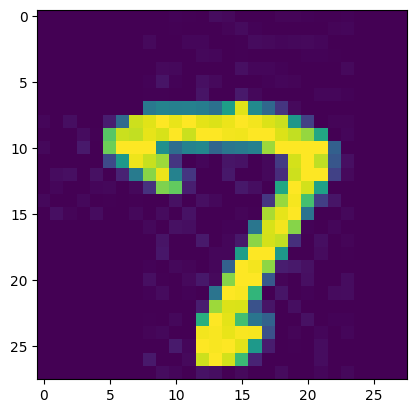

In [120]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [121]:
# image를 numpy array로 변환해서 사용해야 된다.
imgArray = np.array(img)
imgArray = imgArray / 256
imgArray.shape

(28, 28)

In [122]:
img_scaled = imgArray.reshape(1,-1)
img_scaled.shape

(1, 784)

In [123]:
np.argmax(model.predict(img_scaled),axis=1)

1/1 [==============================] - 0s 11ms/step


array([7])

In [125]:
img_scaled = imgArray.reshape(-1)

In [126]:
np.argmax(model.predict(np.array([img_scaled])),axis=1)

1/1 [==============================] - 0s 13ms/step


array([7])

In [127]:
img_scaled = imgArray.reshape(-1)
img_scaled = img_scaled.tolist()
dfArray = pd.DataFrame(img_scaled)
dfArray = dfArray.T
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027344,0.0,0.0,0.015625,0.0,0.019531,0.0,0.0,0.0,0.0


In [128]:
np.argmax(model.predict(dfArray),axis=1)

1/1 [==============================] - 0s 11ms/step


array([7])